# Census income classification

Following are the steps we're going to cover:
1. Import libraries
2. Load dataset
3. Summarize dataset
4. Visualize dataset
5. Evaluate algorithms
6. Make predictions

## 1. Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns

## 2. Load dataset

In [14]:
names = ['age','workclass','final-wt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hrs-per-week','native-country','income']
train = pd.read_csv('census_income_train.csv', header=None, names=names)
test = pd.read_csv('census_income_test.csv', header=None, names=names)

## 3. Summarize dataset

### 3.1 Dimensions of data

In [15]:
train.shape

(32561, 15)

In [16]:
test.shape

(16281, 15)

### 3.2 Peek of data

In [17]:
train.head()

,age,workclass,final-wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
test.head()

,age,workclass,final-wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### 3.3 Statistical summary

In [19]:
train.describe()

,age,final-wt,education-num,capital-gain,capital-loss,hrs-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
test.describe()

,age,final-wt,education-num,capital-gain,capital-loss,hrs-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


### 3.4 Missing values

In [22]:
train.isnull().sum()

age               0
workclass         0
final-wt          0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hrs-per-week      0
native-country    0
income            0
dtype: int64

In [23]:
test.isnull().sum()

age               0
workclass         0
final-wt          0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hrs-per-week      0
native-country    0
income            0
dtype: int64

## 4. Visualize dataset

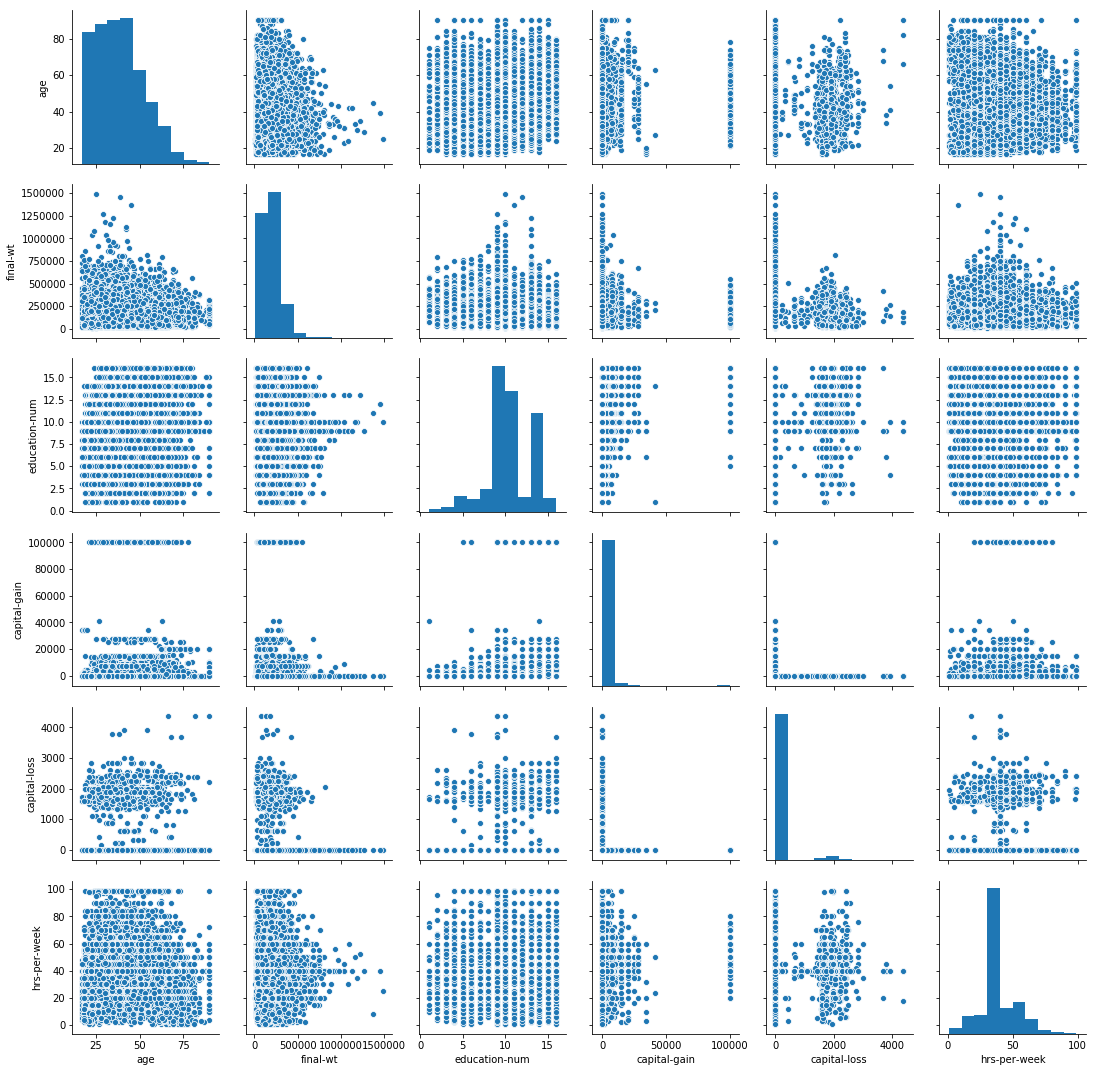

In [26]:
sns.pairplot(train)

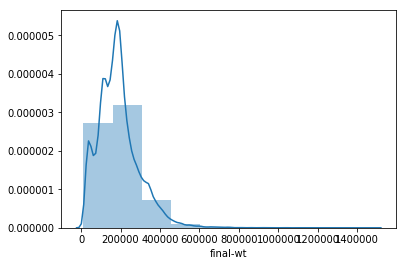

In [40]:
sns.distplot(train['final-wt'], bins=10, kde=True)

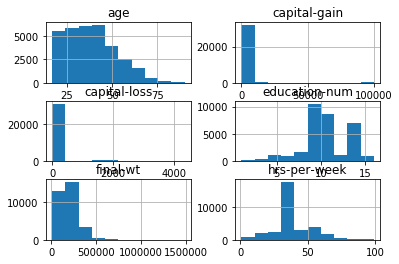

In [28]:
train.hist()
plt.show()

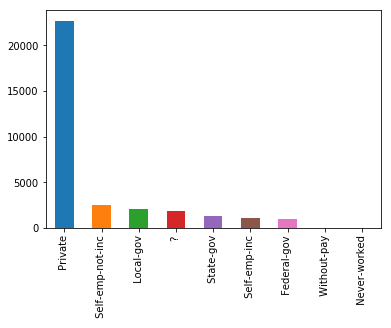

In [29]:
train['workclass'].value_counts().plot.bar()

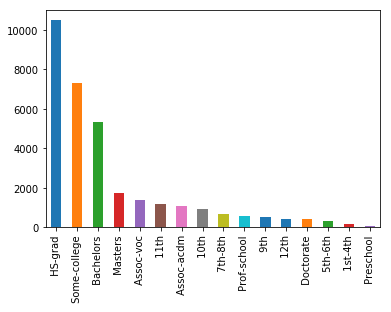

In [30]:
train['education'].value_counts().plot.bar()

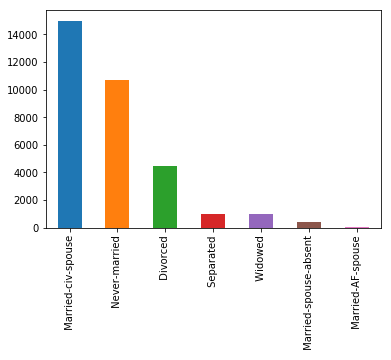

In [31]:
train['marital-status'].value_counts().plot.bar()

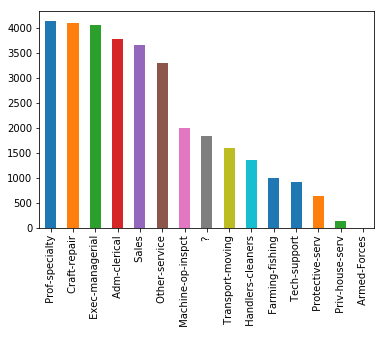

In [32]:
train['occupation'].value_counts().plot.bar()

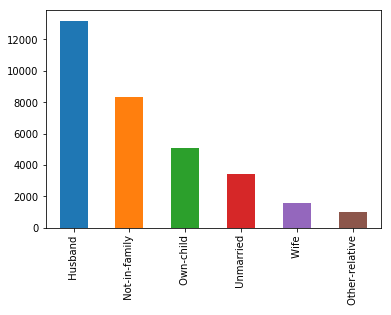

In [33]:
train['relationship'].value_counts().plot.bar()

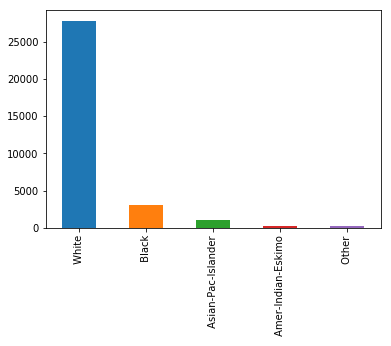

In [34]:
train['race'].value_counts().plot.bar()

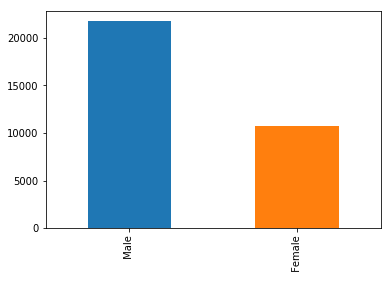

In [35]:
train['sex'].value_counts().plot.bar()

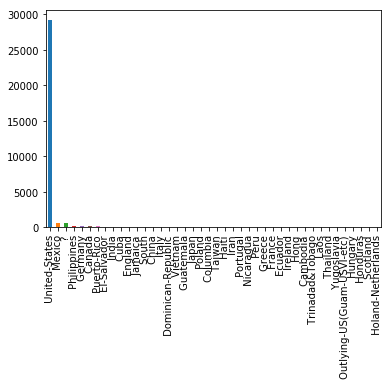

In [36]:
train['native-country'].value_counts().plot.bar()

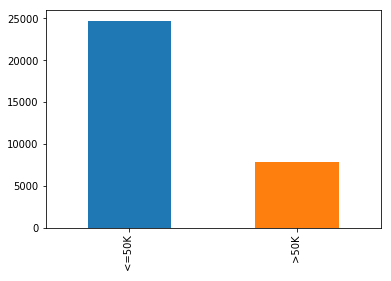

In [37]:
train['income'].value_counts().plot.bar()

Looking at above visualization, we don't need to add columns 'native-country', 'race', 'workclass'.